# REU - Machine Learning Tutorial
### Lecture - 2
### Prepared By - Mumtahin Habib

# Regression vs Classification

## What is Regression?

Regression algorithms predict continuous value from the provided input. A supervised learning algorithm uses real values to predict quantitative data like income, height, weight, scores or probability. Machine learning engineers and data scientists mostly use regression algorithms to operate distinct labeled datasets while mapping estimations.

**Key Concepts in Regression**

**Supervised Learning:** Regression, a type of supervised learning, involves training the model on labeled data where the target variable is known. This allows the model to learn the relationship between the input features (independent variables) and the target variable (dependent variable).


**Continuous Target Variable:** Unlike classification, which predicts discrete labels or classes, regression predicts a continuous numeric value. For example, predicting house prices, stock prices, temperature, or sales revenue are all regression problems where the target variable is a continuous value.

## Types of Regression

### Linear Regression

Most preferable and simple to use, it applies linear equations to the datasets. Using a straight line, the relationship between two quantitative variables i.e., one independent and another dependent, is modeled in simple linear regression. A dependent variable’s multiple linear regression values can use more than two independent variables. It is applicable to predict marketing analytics, sales, and demand forecasting.

Simple Linear Regression: $𝑦=\beta_0+\beta_1x_1$ \\
Multiple Linear Regression: $𝑦=\beta_0+\beta_1x_1+\beta_2x_2+…+\beta_𝑛x_𝑛+𝜖$

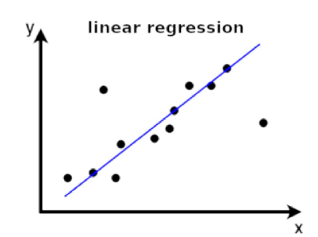

### Polynomial Regression

To find or model the non-linear relationship between an independent and a dependent variable is called polynomial regression. It is specifically used for curvy trend datasets. Various fields like social science, economics, biology, engineering and physics use a polynomial function to predict the model’s accuracy and complexity. In ML, polynomial regression is applicable to predict customers’ lifetime values, stock and house prices.

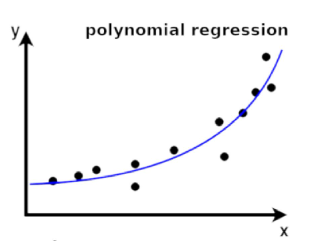

### Logistic Regression

Commonly known as the logit model, [Logistic Regression](https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/) understands the probable chances of the occurrence of an event. It uses a dataset comprising independent variables and finds application in predictive analytics and classification.

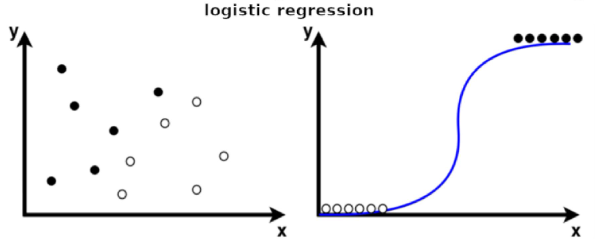

## What is Classification?
Classification is a procedure where a model or function separates data into discrete values, i.e., multiple classes of datasets using independent features. A form If-Then rule derives the mapping function. The values classify or forecast the different values like spam or not spam, yes or no, and true or false. An example of the discrete label includes predicting the possibility of an actor visiting the mall for a promotion, depending on the history of the events. The labels will be Yes or No.

**Key Concepts in Classification** \\
**Supervised Learning:** Classification is a type of supervised learning where the model is trained on a labeled dataset. This means the dataset used for training contains both input features (independent variables) and the corresponding target labels (dependent variables).

**Categorical Target Variable:** The target variable in classification is categorical, meaning it consists of class labels that represent different categories or classes.

## Types of Classification

### Binary Classification
When an input provides a dataset of distinct features describing each point, the output of the model delivered will be binary labeled representing the two classes i.e., categorical. For example, Yes or No, Positive or Negative.

Examples: Spam detection (spam or not spam), disease diagnosis (diseased or not diseased).

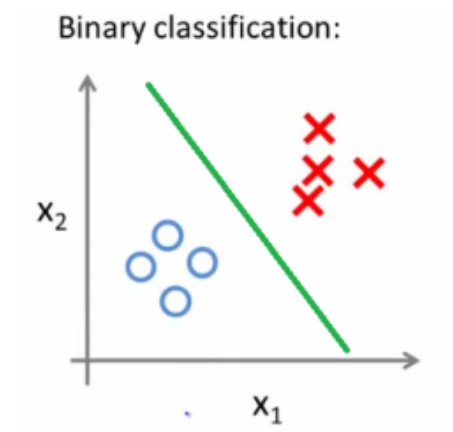

### Multi-class Classification

In machine learning, multi-class classification provides more than two outcomes of the model. Their subtypes are one vs all/rest and multi-class classification algorithms. Multiclass does not rely on binary models and classifies the datasets into multiple classes. At the same time, OAA/OAR represents the highest probability and score from separate binary models trained for each class.

Examples: Handwritten digit recognition (0-9 digits), email categorization (spam, primary, social, promotions).

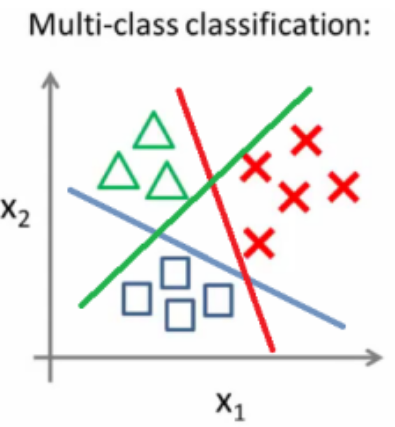

### Linear vs Non-Linear Classification


[Non-Linear Classification](https://nlp.stanford.edu/IR-book/html/htmledition/linear-versus-nonlinear-classifiers-1.html) refers to categorizing those instances that are not linearly separable. It is possible to classify data with a straight line. It is not easy to classify data with a straight line. Data is classified with the help of a hyperplane


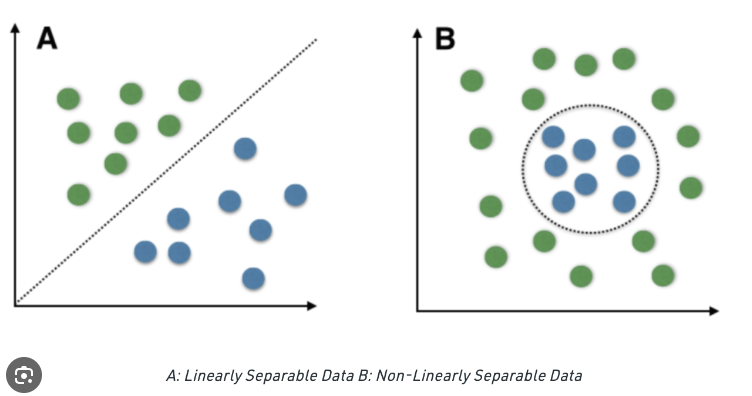

# Simple Linear Classifier using PyTorch

A linear classifier is a type of machine learning model that uses a linear function to classify data into two or more classes. It works by computing a weighted sum of the input features and adding a bias term. The result is then passed through an activation function, which maps the output to a probability distribution over the classes.

In PyTorch, we can define a linear classifier using the nn.Linear module. This module takes two arguments: the number of input features and the number of output classes. It automatically initializes the weight and bias parameters with random values.

Let’s go through an example of building a linear classifier in PyTorch.

## Importing Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Generating and Visualizing Synthetic Data

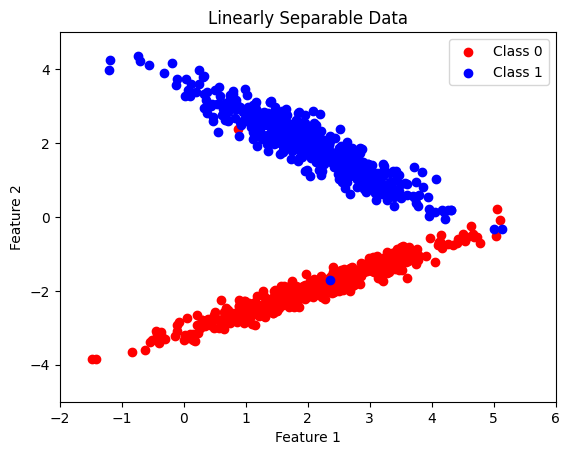

In [2]:
# Generate synthetic linearly separable data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.xlim((-2,6))
plt.ylabel("Feature 2")
plt.ylim((-5,5))
plt.show()

## Preprocess Data

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Define the Linear Classifier Model

In [4]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = LinearClassifier()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Training Function with Visualization

In [5]:
def plot_decision_boundary(model, X, y, epoch):
    # Get the weights and bias from the model
    w = model.linear.weight.data.numpy().flatten()
    b = model.linear.bias.data.numpy().flatten()

    # Calculate the decision boundary line (w0*x1 + w1*x2 + b = 0)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = -(w[0] * x1_min + b) / w[1], -(w[0] * x1_max + b) / w[1]

    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Class 1')
    plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k-', label='Decision Boundary')
    plt.legend()
    plt.title(f"Decision Boundary at Epoch {epoch+1}")
    plt.xlabel("Feature 1")
    plt.xlim((-2,6))
    plt.ylabel("Feature 2")
    plt.ylim((-5,5))
    plt.show()

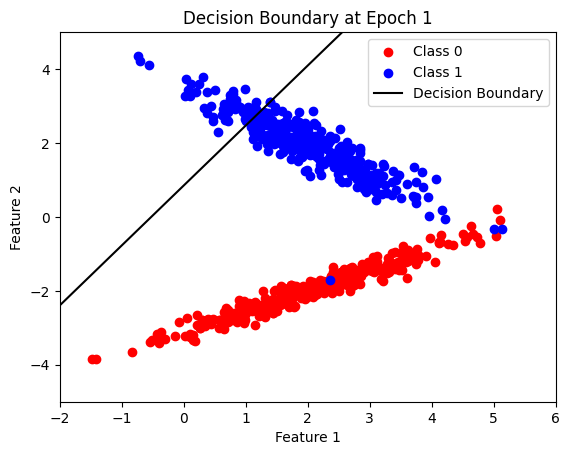

Epoch 1/500, Loss: 0.6125, Weights: [-0.27911398  0.17201805], Bias: [-0.14587621]


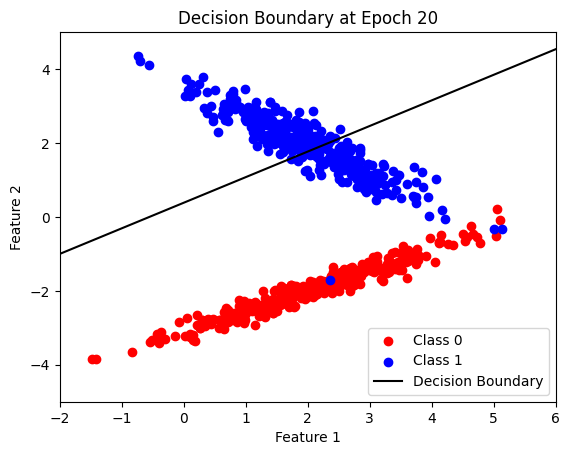

Epoch 20/500, Loss: 0.4824, Weights: [-0.21588705  0.31179166], Bias: [-0.11936184]


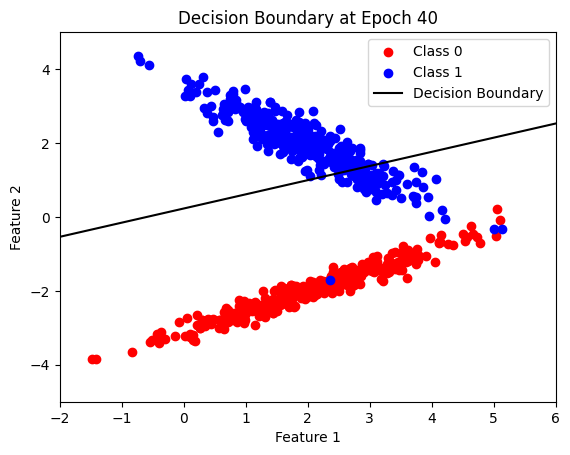

Epoch 40/500, Loss: 0.3923, Weights: [-0.16608207  0.43329167], Bias: [-0.09852404]


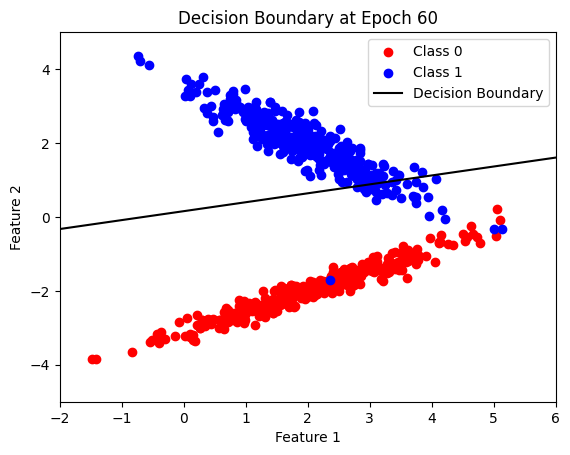

Epoch 60/500, Loss: 0.3315, Weights: [-0.12930076  0.53506213], Bias: [-0.08311304]


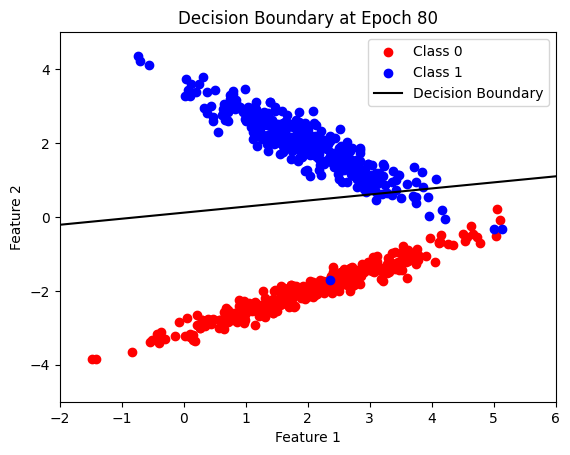

Epoch 80/500, Loss: 0.2886, Weights: [-0.10196783  0.62211984], Bias: [-0.07157923]


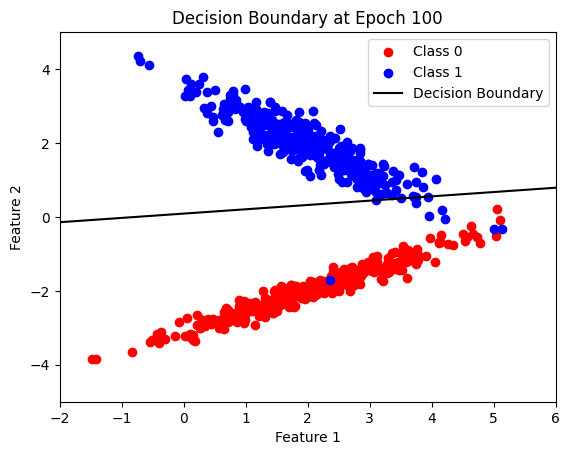

Epoch 100/500, Loss: 0.2569, Weights: [-0.08142702  0.69800335], Bias: [-0.06279414]


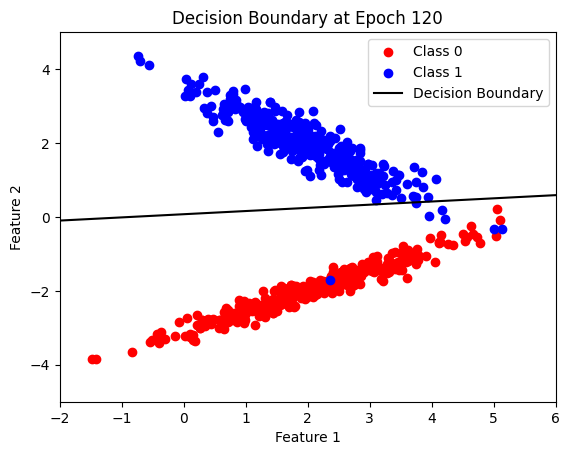

Epoch 120/500, Loss: 0.2326, Weights: [-0.06579265  0.7651952 ], Bias: [-0.05597199]


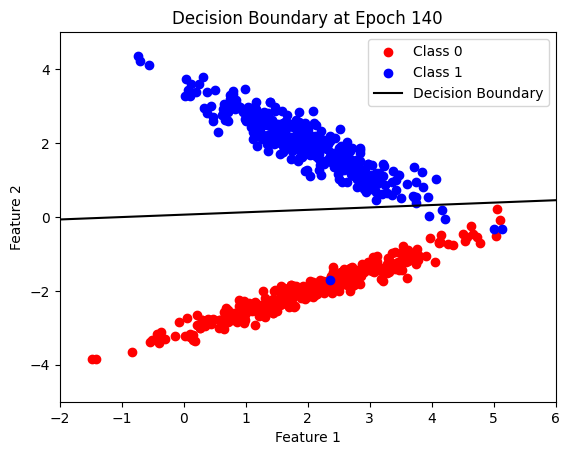

Epoch 140/500, Loss: 0.2134, Weights: [-0.05374023  0.8254657 ], Bias: [-0.05057029]


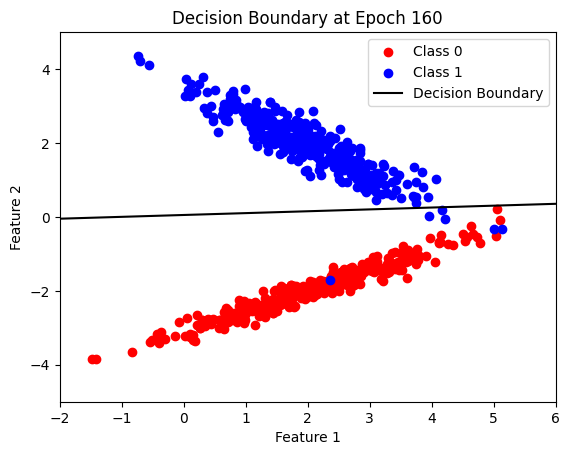

Epoch 160/500, Loss: 0.1978, Weights: [-0.04433575  0.88010705], Bias: [-0.04621219]


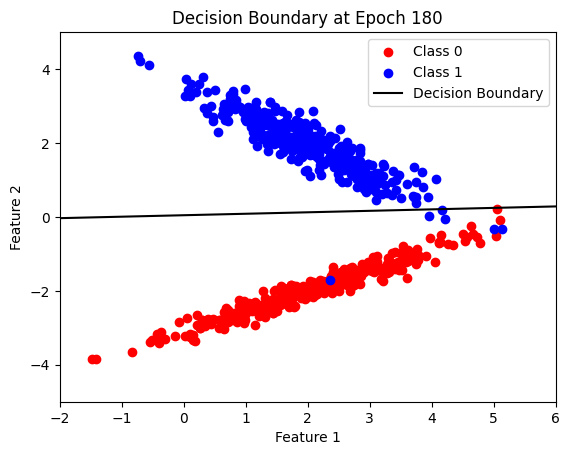

Epoch 180/500, Loss: 0.1849, Weights: [-0.03691383  0.93008566], Bias: [-0.04263261]


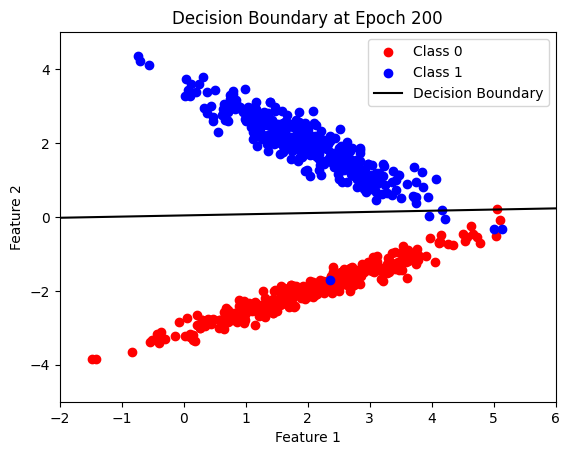

Epoch 200/500, Loss: 0.1740, Weights: [-0.03099458  0.9761405 ], Bias: [-0.03964246]


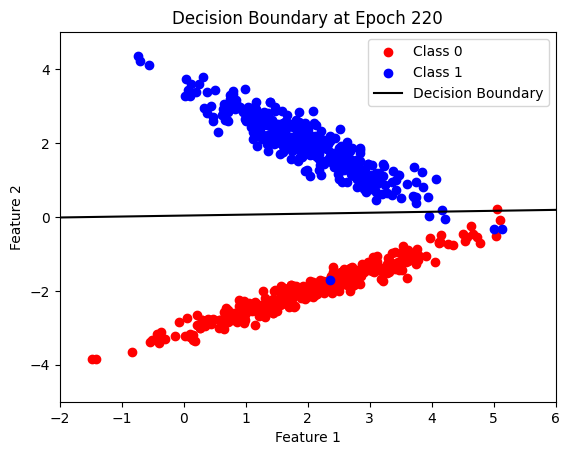

Epoch 220/500, Loss: 0.1647, Weights: [-0.02622737  1.0188487 ], Bias: [-0.03710484]


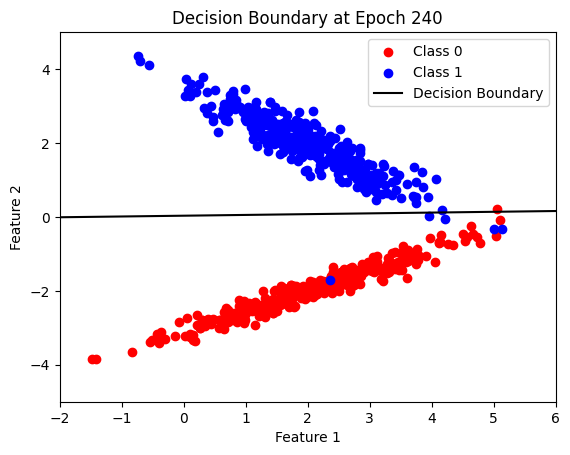

Epoch 240/500, Loss: 0.1566, Weights: [-0.02235287  1.058669  ], Bias: [-0.03491921]


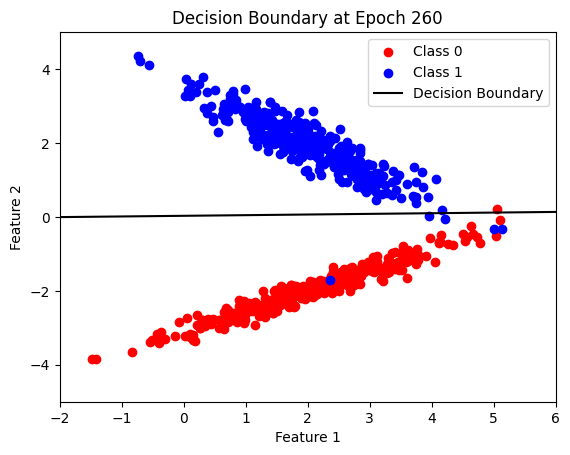

Epoch 260/500, Loss: 0.1495, Weights: [-0.01917694  1.0959716 ], Bias: [-0.0330108]


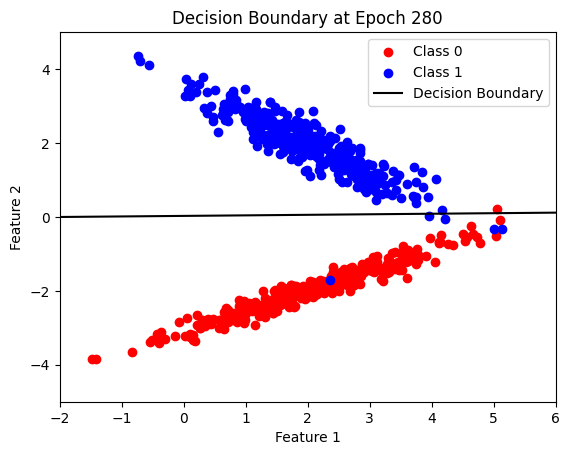

Epoch 280/500, Loss: 0.1433, Weights: [-0.01655263  1.1310604 ], Bias: [-0.03132326]


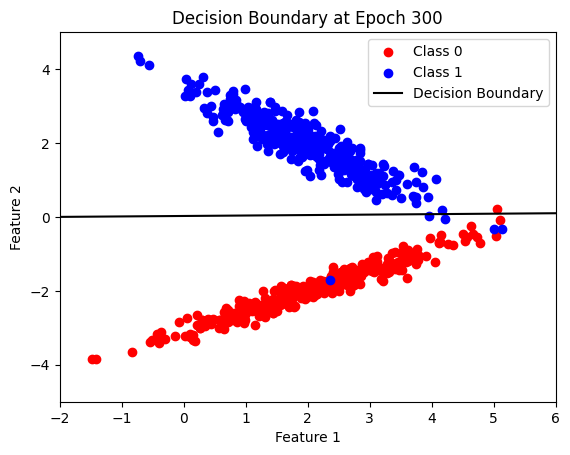

Epoch 300/500, Loss: 0.1378, Weights: [-0.01436758  1.1641866 ], Bias: [-0.02981361]


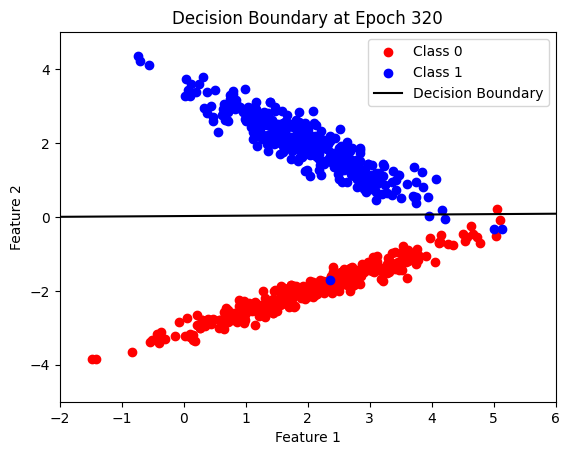

Epoch 320/500, Loss: 0.1328, Weights: [-0.01253504  1.1955612 ], Bias: [-0.02844873]


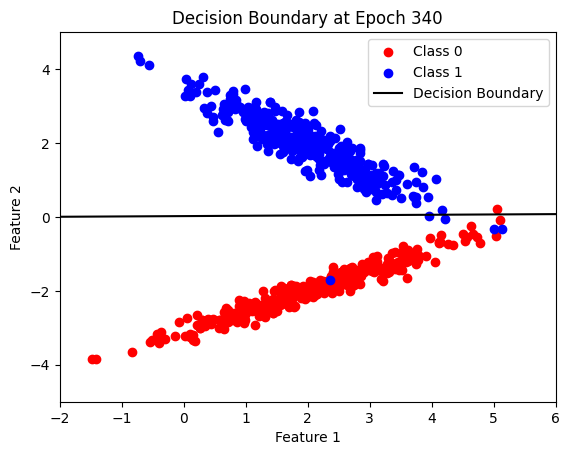

Epoch 340/500, Loss: 0.1283, Weights: [-0.01098745  1.2253628 ], Bias: [-0.02720287]


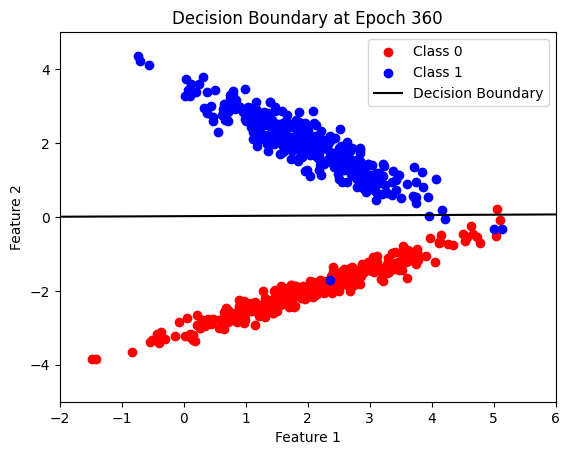

Epoch 360/500, Loss: 0.1242, Weights: [-0.00967174  1.2537435 ], Bias: [-0.02605576]


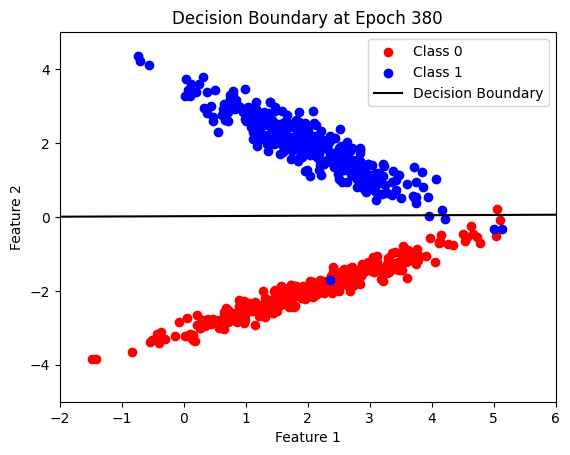

Epoch 380/500, Loss: 0.1206, Weights: [-0.00854594  1.2808352 ], Bias: [-0.02499134]


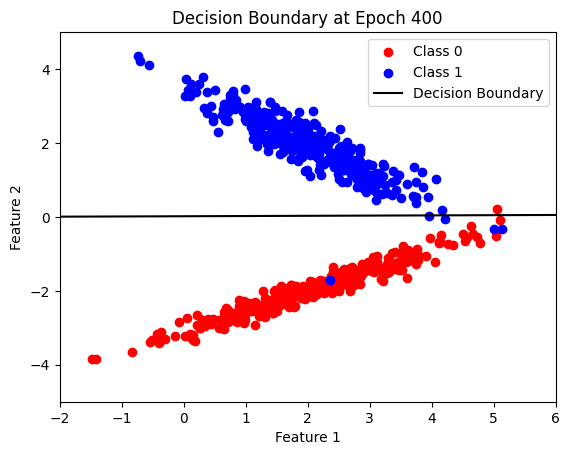

Epoch 400/500, Loss: 0.1172, Weights: [-0.00757659  1.3067514 ], Bias: [-0.02399676]


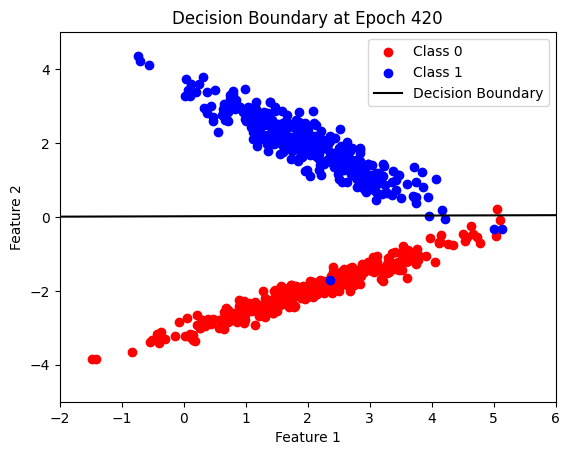

Epoch 420/500, Loss: 0.1141, Weights: [-0.00673686  1.3315915 ], Bias: [-0.02306165]


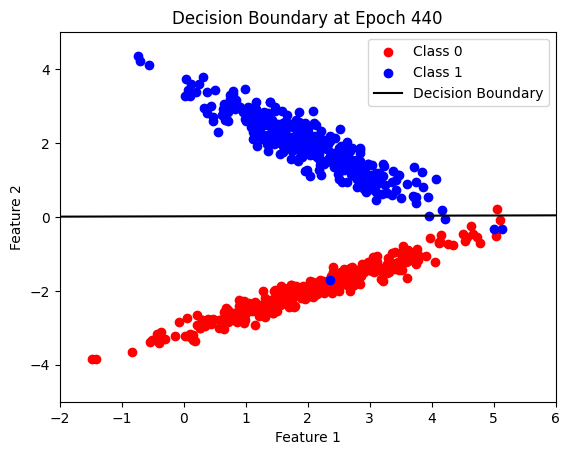

Epoch 440/500, Loss: 0.1112, Weights: [-0.00600509  1.3554425 ], Bias: [-0.02217762]


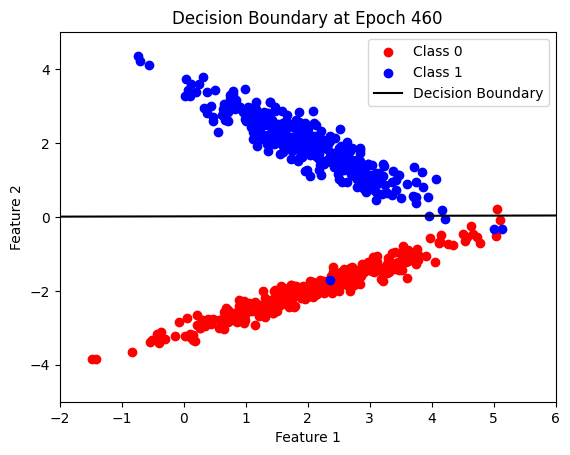

Epoch 460/500, Loss: 0.1086, Weights: [-0.0053637  1.3783814], Bias: [-0.02133778]


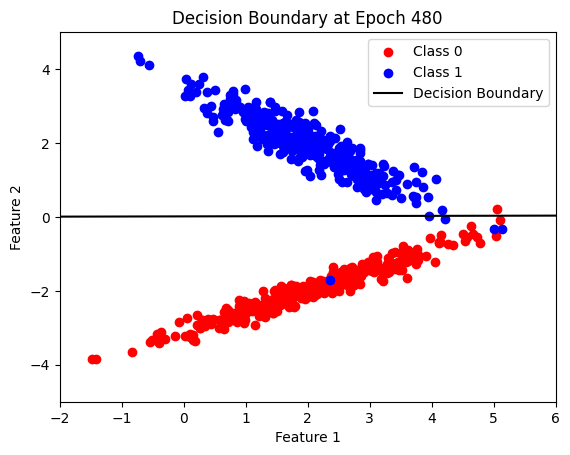

Epoch 480/500, Loss: 0.1061, Weights: [-0.00479834  1.4004765 ], Bias: [-0.02053646]


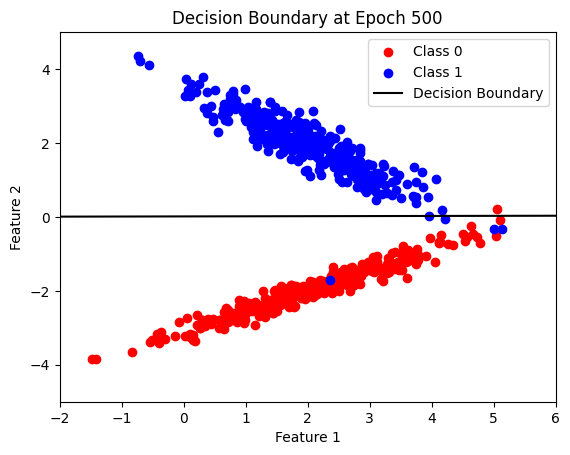

Epoch 500/500, Loss: 0.1038, Weights: [-0.00429724  1.4217887 ], Bias: [-0.01976897]


In [6]:
# Training the model with visualization
epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 20 == 0 or epoch == 0 or epoch == epochs-1:
        plot_decision_boundary(model, X_train.numpy(), y_train.numpy(), epoch)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Weights: {model.linear.weight.data.numpy().flatten()}, Bias: {model.linear.bias.data.numpy().flatten()}")


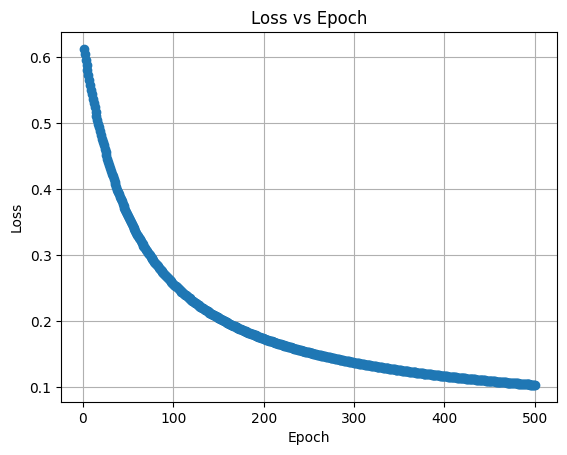

In [7]:
# Plot loss vs epoch
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

**Note: For large training time, you can use [TensorBoard](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html) to visualize the loss vs epoch graph.**

## Evaluate the Model

In [8]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predicted = (outputs > 0.5).float()

accuracy = (predicted.eq(y_test).sum() / y_test.shape[0]).item()
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 99.67%


## Final Visualization of Predictions on Test Set

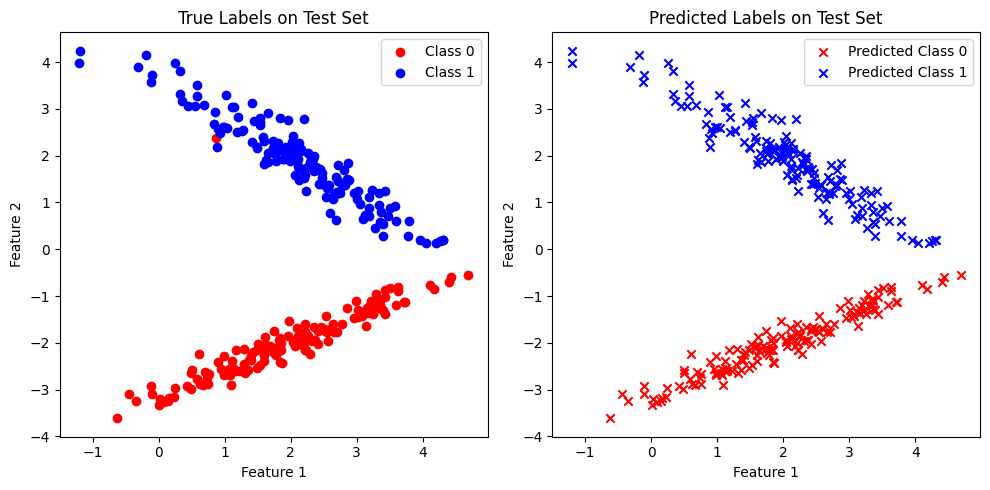

In [9]:
# Visualize the true labels and predicted labels on test data
true_labels = y_test.numpy().flatten()
pred_labels = predicted.numpy().flatten()

plt.figure(figsize=(10, 5))

# Plot true labels
plt.subplot(1, 2, 1)
plt.scatter(X_test.numpy()[true_labels == 0][:, 0], X_test.numpy()[true_labels == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test.numpy()[true_labels == 1][:, 0], X_test.numpy()[true_labels == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("True Labels on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test.numpy()[pred_labels == 0][:, 0], X_test.numpy()[pred_labels == 0][:, 1], marker='x', color='red', label='Predicted Class 0')
plt.scatter(X_test.numpy()[pred_labels == 1][:, 0], X_test.numpy()[pred_labels == 1][:, 1], marker='x', color='blue', label='Predicted Class 1')
plt.legend()
plt.title("Predicted Labels on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# An example of using Linear Classifier over linearly non-separable data

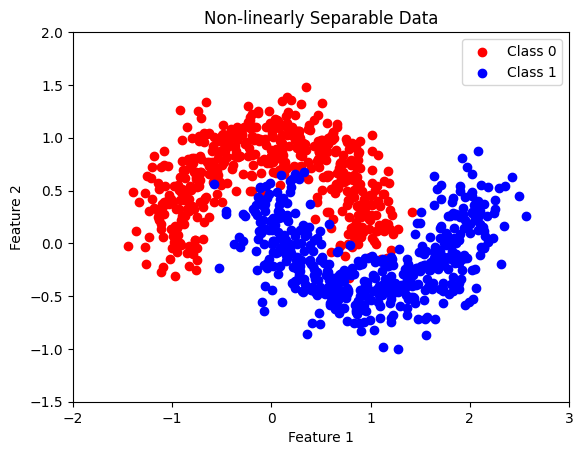

In [14]:
# Generate synthetic non-linearly separable data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Non-linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim((-2,3))
plt.ylim((-1.5,2))
plt.show()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [15]:
def plot_decision_boundary(model, X, y, epoch):
    # Get the weights and bias from the model
    w = model.linear.weight.data.numpy().flatten()
    b = model.linear.bias.data.numpy().flatten()

    # Calculate the decision boundary line (w0*x1 + w1*x2 + b = 0)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = -(w[0] * x1_min + b) / w[1], -(w[0] * x1_max + b) / w[1]

    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Class 1')
    plt.plot([x1_min, x1_max], [x2_min, x2_max], 'k-', label='Decision Boundary')
    plt.legend()
    plt.title(f"Decision Boundary at Epoch {epoch+1}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim((-2,3))
    plt.ylim((-1.5,2))
    plt.show()

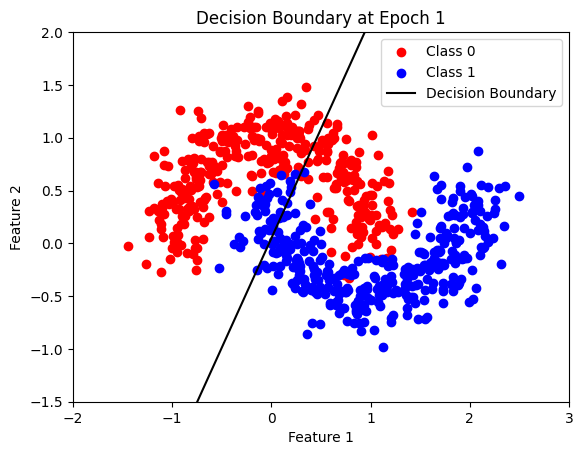

Epoch 1/500, Loss: 0.4938, Weights: [ 0.892134  -0.4304303], Bias: [0.02011638]


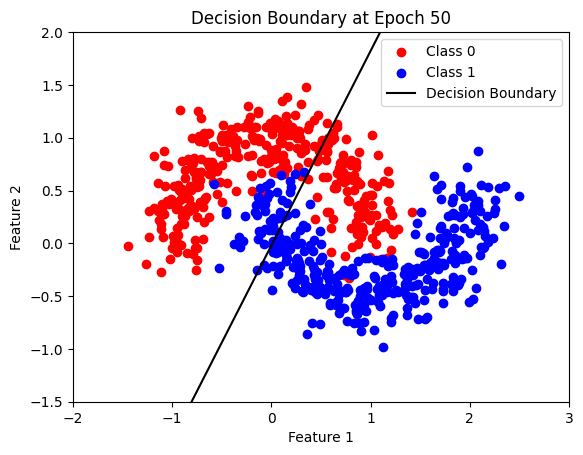

Epoch 50/500, Loss: 0.4817, Weights: [ 0.91541564 -0.49721563], Bias: [-0.01028601]


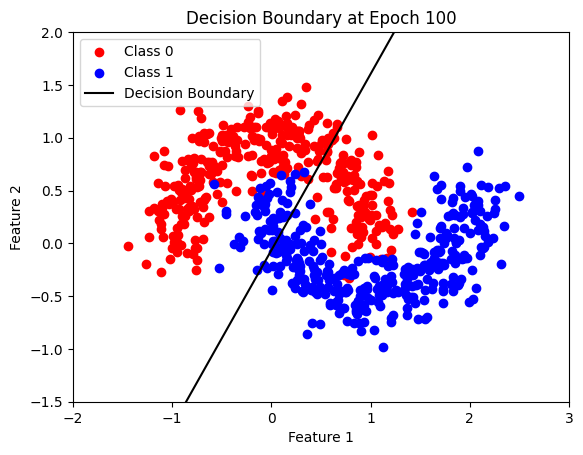

Epoch 100/500, Loss: 0.4708, Weights: [ 0.9380935 -0.5620847], Bias: [-0.03747696]


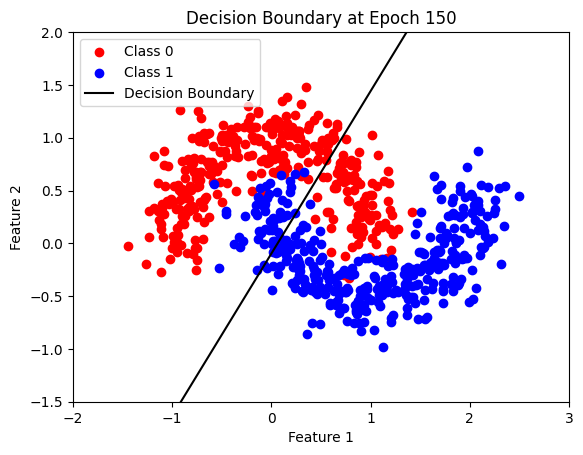

Epoch 150/500, Loss: 0.4610, Weights: [ 0.9597044 -0.6239323], Bias: [-0.06128021]


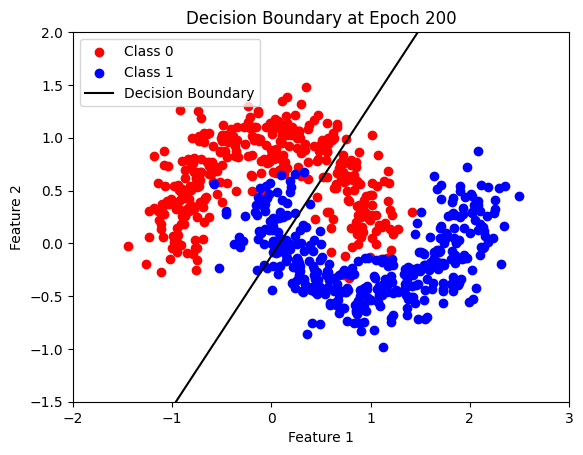

Epoch 200/500, Loss: 0.4523, Weights: [ 0.9802748  -0.68302125], Bias: [-0.08211774]


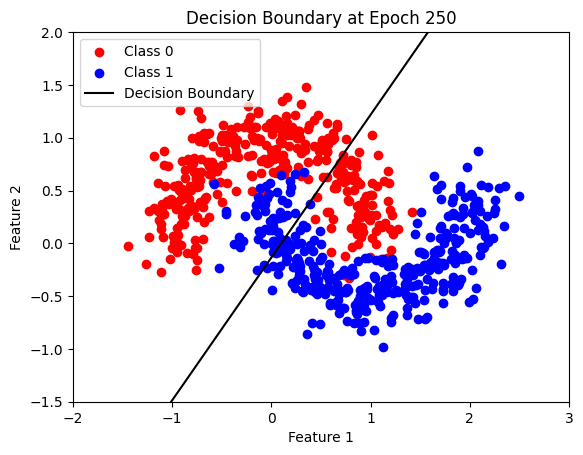

Epoch 250/500, Loss: 0.4445, Weights: [ 0.9998352  -0.73958546], Bias: [-0.10035486]


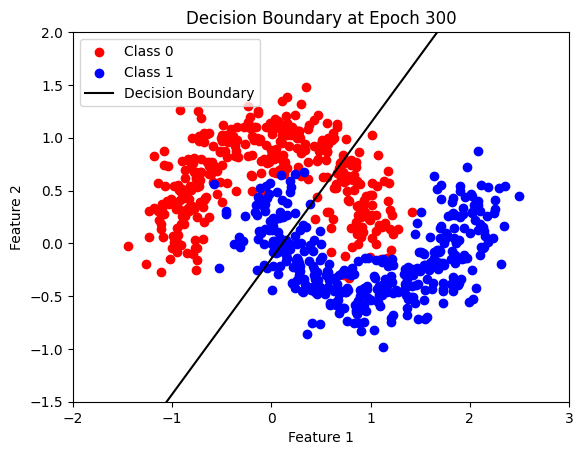

Epoch 300/500, Loss: 0.4374, Weights: [ 1.0184182 -0.7938336], Bias: [-0.11630727]


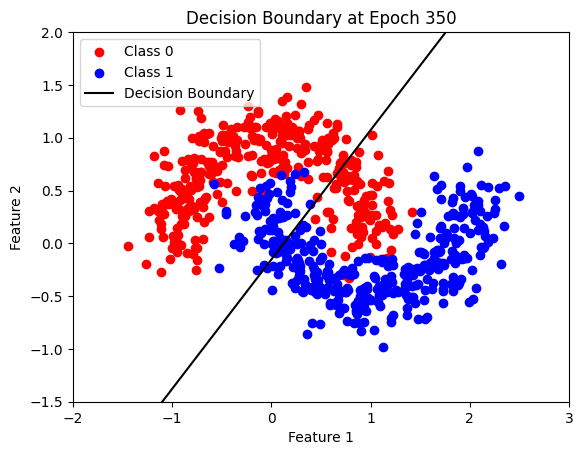

Epoch 350/500, Loss: 0.4309, Weights: [ 1.0360588 -0.8459514], Bias: [-0.13024805]


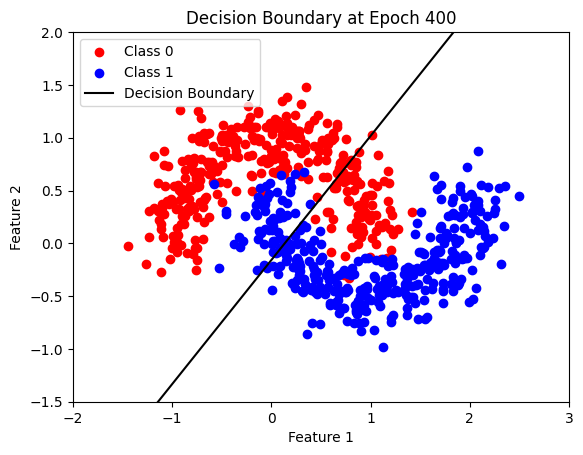

Epoch 400/500, Loss: 0.4250, Weights: [ 1.0527937 -0.8961041], Bias: [-0.1424134]


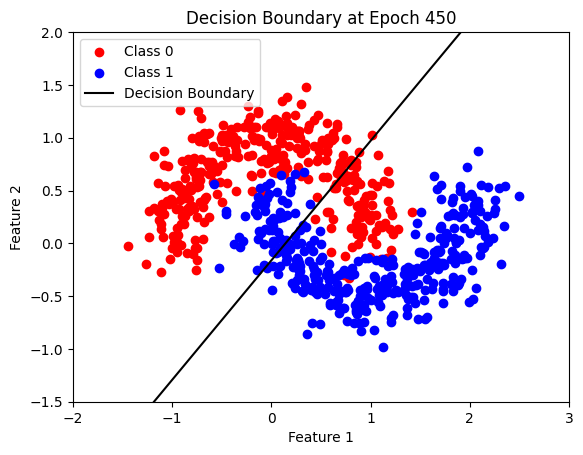

Epoch 450/500, Loss: 0.4196, Weights: [ 1.0686585  -0.94443995], Bias: [-0.15300786]


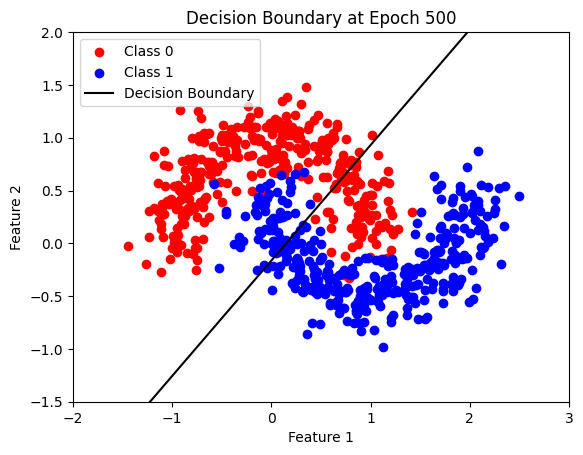

Epoch 500/500, Loss: 0.4146, Weights: [ 1.0836902 -0.9910911], Bias: [-0.16220915]


In [16]:
# Training the model with visualization
epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch+1) % 50 == 0 or epoch == 0 or epoch == epochs-1:
        plot_decision_boundary(model, X_train.numpy(), y_train.numpy(), epoch)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Weights: {model.linear.weight.data.numpy().flatten()}, Bias: {model.linear.bias.data.numpy().flatten()}")

#Summarization of Our Learning

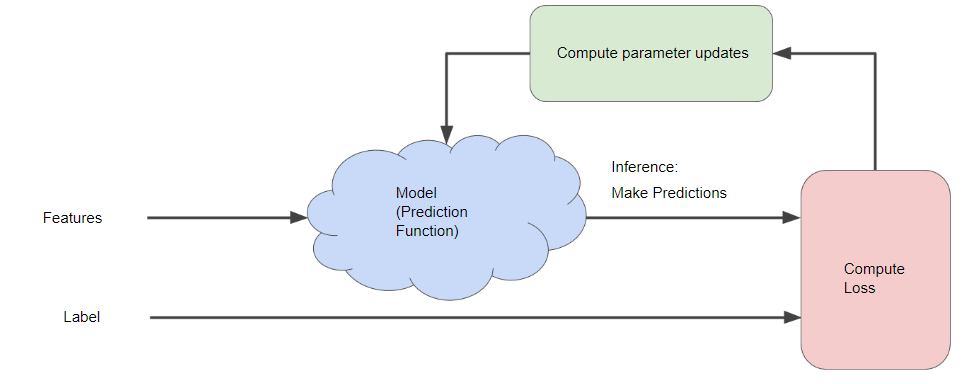

#  Loss Functions

This tutorial is adapted from the blog post by Alfrick Opidi and
Abhishek Jha on [Neptune AI](https://neptune.ai/blog/pytorch-loss-functions)

## What are the loss functions?

Loss functions are used to gauge the error between the prediction output and the provided target value. A loss function tells us how far the algorithm model is from realizing the expected outcome. The word ‘loss’ means the penalty that the model gets for failing to yield the desired results.

For example, a loss function (let’s call it J) can take the following two parameters:

* Predicted output (y_pred)
* Target value (y)



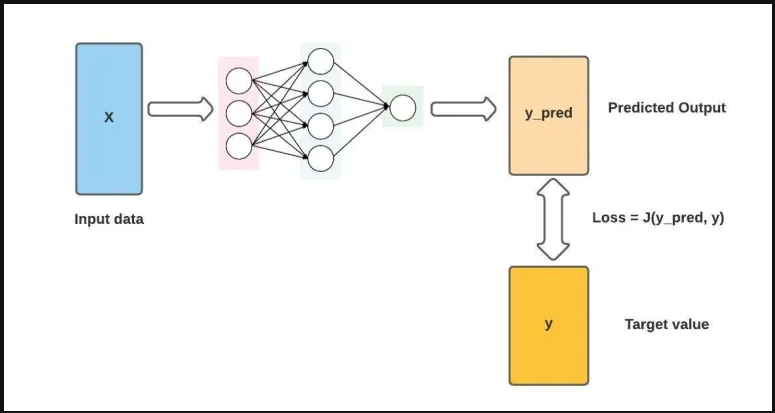

This function will determine your model’s performance by comparing its predicted output with the expected output. If the deviation between y_pred and y is very large, the loss value will be very high.

If the deviation is small or the values are nearly identical, it’ll output a very low loss value. Therefore, you need to use a loss function that can penalize a model properly when it is training on the provided dataset.

Loss functions change based on the problem statement that your algorithm is trying to solve.

## How to add PyTorch loss functions?

PyTorch’s [torch.nn](https://pytorch.org/docs/stable/nn.html) module has multiple standard loss functions that you can use in your project.

To add them, you need to first import the libraries:

In [ ]:
import torch
import torch.nn as nn

Next, define the type of loss you want to use. Here’s how to define the mean absolute error loss function:

In [ ]:
loss = nn.L1Loss()

After adding a function, you can use it to accomplish your specific task.

## Which loss functions are available in PyTorch?

Broadly speaking, loss functions in PyTorch are divided into two main categories: regression losses and classification losses.

**Regression loss functions** are used when the model is predicting a continuous value, like the age of a person.

**Classification loss functions** are used when the model is predicting a discrete value, such as whether an email is spam or not.

Now we’ll explore the different types of loss functions in PyTorch, and how to use them:

* Mean Absolute Error Loss
* Mean Squared Error Loss
* Negative Log-Likelihood Loss
* Cross-Entropy Loss

### Mean Absolute Error (L1 Loss Function)

In [ ]:
torch.nn.L1Loss

**The Mean Absolute Error (MAE)**, also called L1 Loss, computes the average of the sum of absolute differences between actual values and predicted values.

It checks the size of errors in a set of predicted values, without caring about their positive or negative direction. If the absolute values of the errors are not used, then negative values could cancel out the positive values.

The Pytorch L1 Loss is expressed as:

$loss(x,y) = |x - y|$

where x represents the actual value and y the predicted value.

**When could it be used?**

Regression problems, especially when the distribution of the target variable has outliers, such as small or big values that are a great distance from the mean value. It is considered to be more robust to outliers.

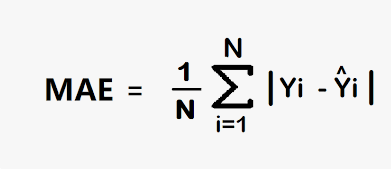

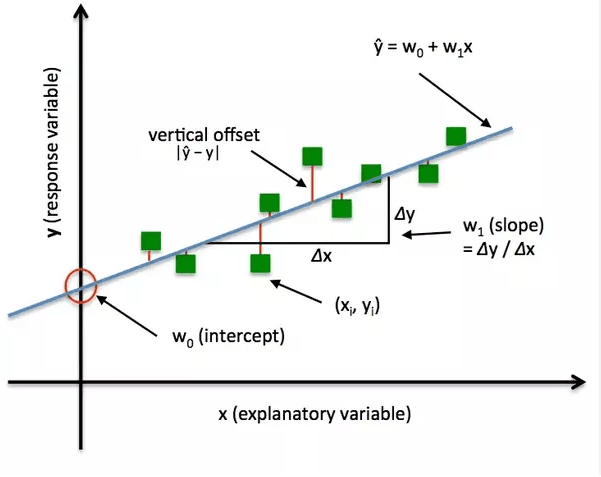

In [ ]:
import torch
import torch.nn as nn

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

mae_loss = nn.L1Loss()
output = mae_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 1.1909, -0.3660,  0.2727,  0.8725,  0.2476],
        [ 0.5321,  0.4186,  1.1358,  0.3220,  1.4501],
        [ 0.9163,  1.9088, -1.2235, -0.9724, -1.0786]], requires_grad=True)
target:  tensor([[ 0.3165,  0.0631,  0.6035, -0.0619,  1.1976],
        [-1.1863,  1.8435,  1.0861, -0.3317, -1.1855],
        [ 0.1254, -0.4937,  0.0327, -1.0763,  0.7773]])
output:  tensor(1.0940, grad_fn=<MeanBackward0>)


### Mean Squared Error Loss Function

In [ ]:
torch.nn.MSELoss

The Mean Squared Error (MSE), also called L2 Loss, computes the average of the squared differences between actual values and predicted values.

Pytorch MSE Loss always outputs a positive result, regardless of the sign of actual and predicted values. To enhance the accuracy of the model, you should try to reduce the L2 Loss—a perfect value is 0.0.

The squaring implies that larger mistakes produce even larger errors than smaller ones. If the classifier is off by 100, the error is 10,000. If it’s off by 0.1, the error is 0.01. This punishes the model for making big mistakes and encourages small mistakes.

The Pytorch L2 Loss is expressed as:

$loss(x,y) = (x-y)^2$

where x represents the actual value and y the predicted value.

**When could it be used?**

MSE is the default loss function for most Pytorch regression problems.

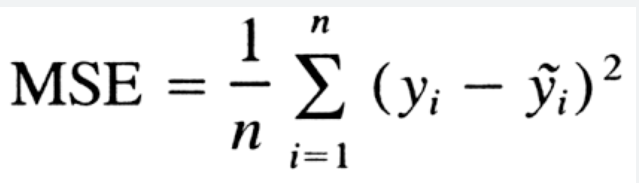

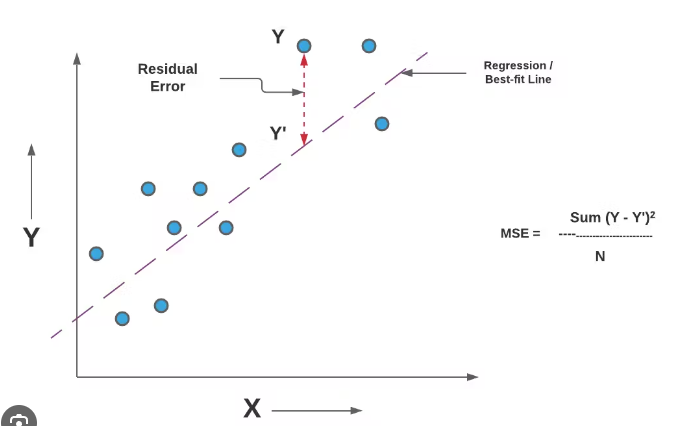

In [ ]:
import torch
import torch.nn as nn

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
mse_loss = nn.MSELoss()
output = mse_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[-0.4512,  0.6758, -1.0131,  0.6446,  0.3487],
        [ 1.1349, -0.2693,  0.5275, -0.3044,  0.9145],
        [-1.7465, -2.4173,  0.0467, -1.8930,  2.0731]], requires_grad=True)
target:  tensor([[-0.9319, -0.4922,  0.9159, -0.7672,  0.5755],
        [ 1.4404, -1.2256,  0.2466, -1.2183, -0.1078],
        [ 1.1309,  0.7673, -1.0692, -0.1028, -0.1102]])
output:  tensor(2.5311, grad_fn=<MseLossBackward0>)


### Cross-Entropy Loss Function

In [ ]:
torch.nn.CrossEntropyLoss

This loss function computes the difference between two probability distributions for a provided set of occurrences or random variables.

It is used to work out a score that summarizes the average difference between the predicted values and the actual values. To enhance the accuracy of the model, you should try to minimize the score—the cross-entropy score is between 0 and 1, and a perfect value is 0.

Other loss functions, like the squared loss, punish incorrect predictions. Cross-Entropy penalizes greatly for being very confident and wrong.

Unlike the Negative Log-Likelihood Loss, which doesn’t punish based on prediction confidence, Cross-Entropy punishes incorrect but confident predictions, as well as correct but less confident predictions.

The Cross-Entropy function has a wide range of variants, of which the most common type is the Binary Cross-Entropy (BCE). The BCE Loss is mainly used for binary classification models; that is, models having only 2 classes.

The Pytorch Cross-Entropy Loss is expressed as:

$l(x,y) = L = \{ l_1, ..., l_N \}^T, \text{ where, } l_n = -w_{y_n} log(\frac{exp(x_{n,y_n})}{\sum_{c = 1}^{C} exp(x_{n,c})})$

Where x is the input, y is the target, w is the weight, C is the number of classes, and N spans the mini-batch dimension.

**When could it be used?**

*  Binary classification tasks, for which it’s the default loss function in Pytorch.
*  Creating confident models—the prediction will be accurate and with a higher probability.

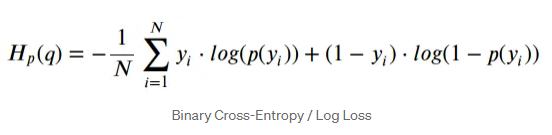

In [28]:
import torch
import torch.nn as nn

input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

cross_entropy_loss = nn.CrossEntropyLoss()
output = cross_entropy_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.8427,  0.5937, -0.6531, -0.3733, -1.7198],
        [-0.4793,  2.4738,  1.3575,  0.3096,  0.2690],
        [ 0.6423, -1.4326,  0.4031, -1.5220,  1.4381]], requires_grad=True)
target:  tensor([2, 1, 1])
output:  tensor(2.1183, grad_fn=<NllLossBackward0>)


### Categorical Cross-Entropy Loss

In [ ]:
torch.nn.NLLLoss

The Negative Log-Likelihood Loss function (NLL) is applied only on models with the softmax function as an output activation layer. Softmax refers to an activation function that calculates the normalized exponential function of every unit in the layer.

The Softmax function is expressed as:

$ S(f_{y_i}) =  \frac{e^{f_{y_i}}}{\sum_j e^{f_j}}$

The function takes an input vector of size N, and then modifies the values such that every one of them falls between 0 and 1. Furthermore, it normalizes the output such that the sum of the N values of the vector equals to 1.

NLL uses a negative connotation since the probabilities (or likelihoods) vary between zero and one, and the logarithms of values in this range are negative. In the end, the loss value becomes positive.

In NLL, minimizing the loss function assists us get a better output. The negative log likelihood is retrieved from approximating the maximum likelihood estimation (MLE). This means that we try to maximize the model’s log likelihood, and as a result, minimize the NLL.  

In NLL, the model is punished for making the correct prediction with smaller probabilities and encouraged for making the prediction with higher probabilities. The logarithm does the punishment.

NLL does not only care about the prediction being correct but also about the model being certain about the prediction with a high score.

The Pytorch NLL Loss is expressed as:

$l(x,y) = L = \{ l_1, ..., l_N \}^T,  \text{where, } l_n = -w_{y_n}x_{n,y_n}$

where x is the input, y is the target, w is the weight, and N is the batch size.

**When could it be used?**

Multi-class classification problems

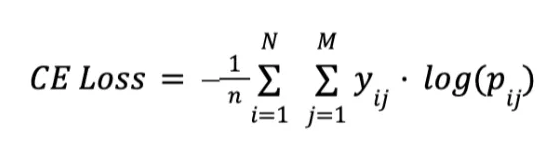

In [29]:
from IPython.display import Image
Image(filename='/content/Capture61.PNG')

In [ ]:
import torch
import torch.nn as nn

# size of input (N x C) is = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# every element in target should have 0 <= value < C
target = torch.tensor([1, 0, 4])

m = nn.LogSoftmax(dim=1)
nll_loss = nn.NLLLoss()
output = nll_loss(m(input), target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.0132, -0.1125, -2.0759, -0.4357,  0.5559],
        [-1.1852,  2.0827,  0.7145,  1.0918,  1.8291],
        [-1.4014,  0.4532, -0.7389,  0.6811,  0.6603]], requires_grad=True)
target:  tensor([1, 0, 4])
output:  tensor(2.3083, grad_fn=<NllLossBackward0>)


You can also explore some other loss functions such as:

* Hinge Embedding Loss
* Margin Ranking Loss
* Triplet Margin Loss
* Kullback-Leibler divergence

from [this tutorial](https://neptune.ai/blog/pytorch-loss-functions)


**I strongly recommend you to read this article on [Loss Function and their uses](https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9)**

## Creating a custom loss function

PyTorch lets you create your own custom loss functions to implement in your projects. Here’s how you can create your own simple Cross-Entropy Loss function.

### Creating custom loss function as a python function

In [ ]:
def myCustomLoss(my_outputs, my_labels):
    #specifying the batch size
    my_batch_size = my_outputs.size()[0]
    #calculating the log of softmax values
    my_outputs = F.log_softmax(my_outputs, dim=1)
    #selecting the values that correspond to labels
    my_outputs = my_outputs[range(my_batch_size), my_labels]
    #returning the results
    return -torch.sum(my_outputs)/number_examples

### Creating custom loss function with a class definition

Let’s modify the Dice coefficient, which computes the similarity between two samples, to act as a loss function for binary classification problems:

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        inputs = F.sigmoid(inputs)

        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)

        return 1 - dice

#Optimizers

The ultimate goal of ML model is to reach the minimum of the loss function. After we pass input, we calculate the error and update the weights accordingly. This is where optimizer comes into play. It defines how to tweak the parameters to get closer to the minima.

## Gradient Descent
I strongly recommend you to study [this article](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21).



Suppose we had the time and the computing resources to calculate the loss for all possible values of $w_1$. For the kind of regression problems we've been examining, the resulting plot of loss vs. $w_1$  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:

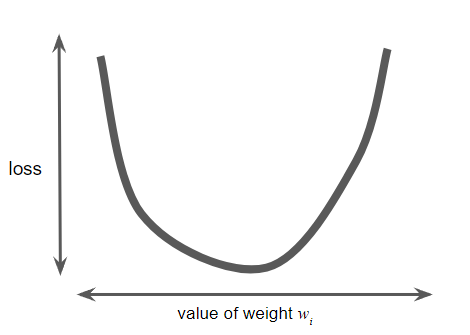

Convex problems have only one minimum; that is, only one place where the slope is exactly 0. That minimum is where the loss function converges. Calculating the loss function for every conceivable value of $w_1$ over the entire data set would be an inefficient way of finding the convergence point. Let's examine a better mechanism—very popular in machine learning—called gradient descent.

The first stage in gradient descent is to pick a starting value (a starting point) for $w_1$ . The starting point doesn't matter much; therefore, many algorithms simply set $w_1$ to 0 or pick a random value. The following figure shows that we've picked a starting point slightly greater than 0:

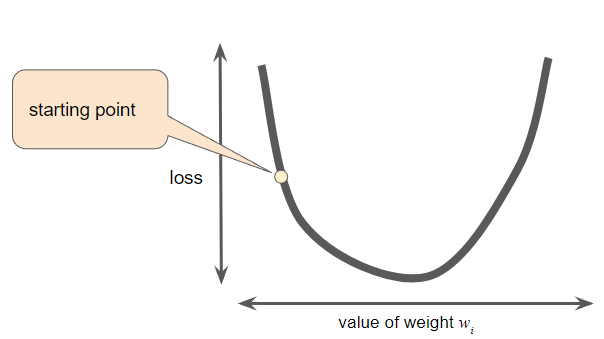

The gradient descent algorithm then calculates the gradient of the loss curve at the starting point. Here in Figure 3, the gradient of the loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Note that a gradient is a vector, so it has both of the following characteristics:

*  a direction \\
*  a magnitude

The gradient always points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

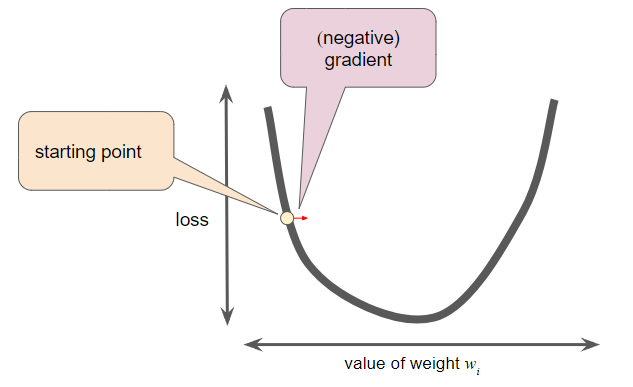

In [16]:
from IPython.display import Image
Image(filename='/content/Capture12.PNG')

To determine the next point along the loss function curve, the gradient descent algorithm adds some fraction of the gradient's magnitude to the starting point as shown in the following figure:

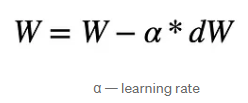

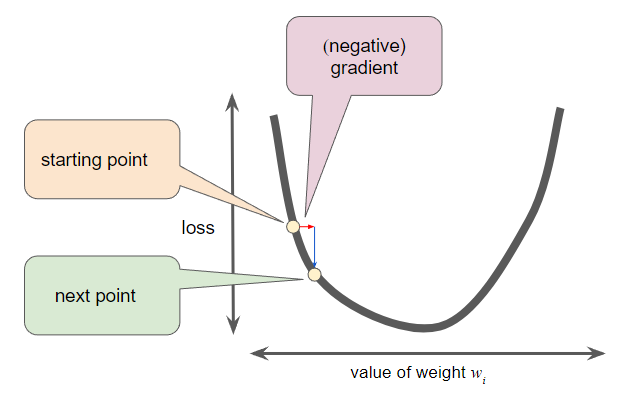

The gradient descent then repeats this process, edging ever closer to the minimum.

Recommended Reading: [Partial Derivative and Gradients](https://machinelearningmastery.com/a-gentle-introduction-to-partial-derivatives-and-gradient-vectors/)

## Learning Rate

Learning rate ($\lambda$) is one such hyper-parameter that defines the adjustment in the weights of our network with respect to the loss gradient descent. It determines how fast or slow we will move towards the optimal weights

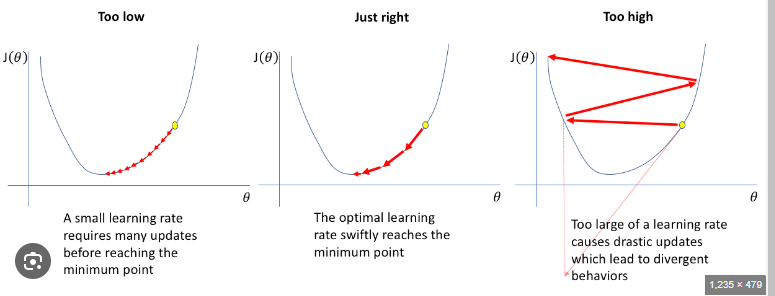

**Recommended Reading on Optimizers:**


*   [Optimizers in Machine Learning](https://medium.com/nerd-for-tech/optimizers-in-machine-learning-f1a9c549f8b4)
*   [Optimizers in Deep Learning](https://musstafa0804.medium.com/optimizers-in-deep-learning-7bf81fed78a0)
*   [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html)



#Appendix

# Building a Simple Single Layer Neural Network in PyTorch

This tutorial is adapted from the blog post by Muhammad Asad Iqbal Khan a on [Machine Learning Mastery](https://machinelearningmastery.com/building-a-single-layer-neural-network-in-pytorch/)

##Preparing the Data

A neural network simply a function that approximates other functions with some parameters. Let’s build some data and see how our single layer neural network approximates the function to make the data linearly separable. Later in this tutorial, you will visualize the function during training to see how the approximated function overlaps over the given set of data points.

In [ ]:
import torch
import matplotlib.pyplot as plt

# generate synthetic the data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0

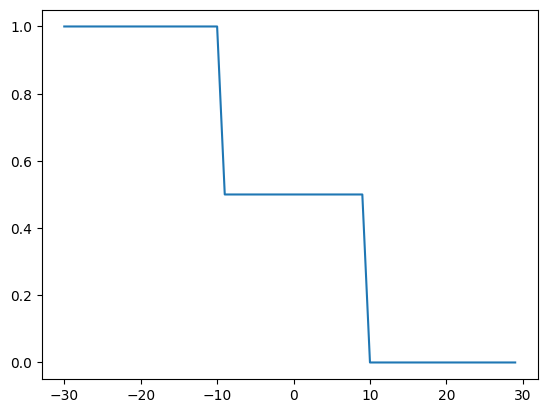

In [ ]:
...
plt.plot(X, Y)
plt.show()

## Build the Model with nn.Module

Next, let’s build our custom module for single layer neural network with nn.Module.

This neural network features an input layer, a hidden layer with two neurons, and an output layer. After each layer, a sigmoid activation function is applied. Other kind of activation functions are available in PyTorch but the classic design for this network is to use sigmoid function.

Here is how your single layer neural network looks like in code.

In [ ]:
# Define the class for single layer NN
class one_layer_net(torch.nn.Module):
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()
        # hidden layer
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size)
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

Let’s also instantiate a model object.

In [ ]:
# create the model
model = one_layer_net(1, 2, 1)  # 2 represents two neurons in one hidden layer

## Train the Model

Before starting the training loop, let’s define loss function and optimizer for the model. You will write a loss function for the cross entropy loss and use stochastic gradient descent for parameter optimization. **We will discuss about optimizer in the next class.**

In [ ]:
def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Now you have all components to train the model. Let’s train the model for 5000 epochs. You will see a plot of how the neural network approximates the function after every 1000 epochs.

1000 epochs done!


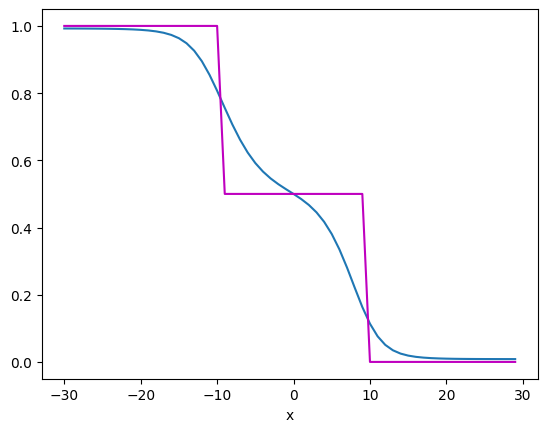

2000 epochs done!


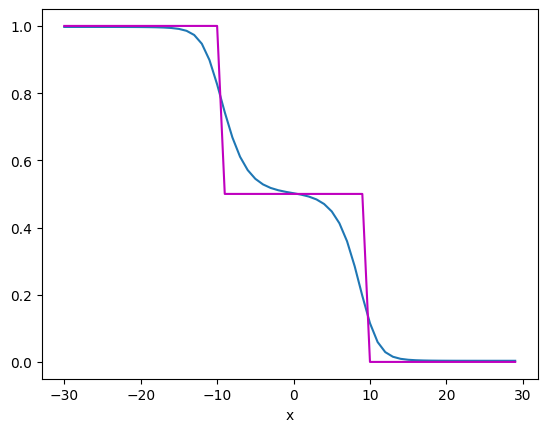

3000 epochs done!


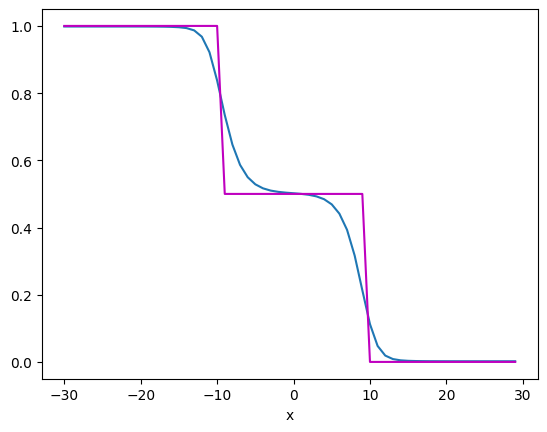

4000 epochs done!


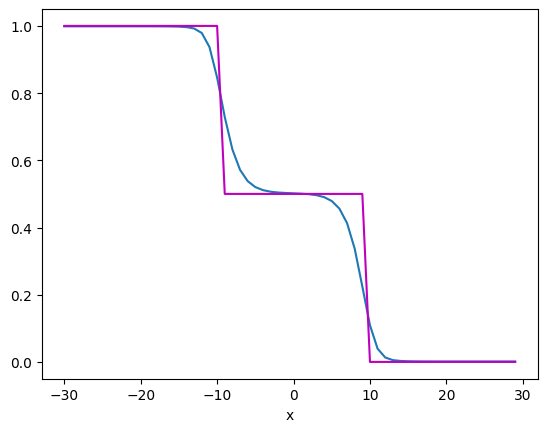

5000 epochs done!


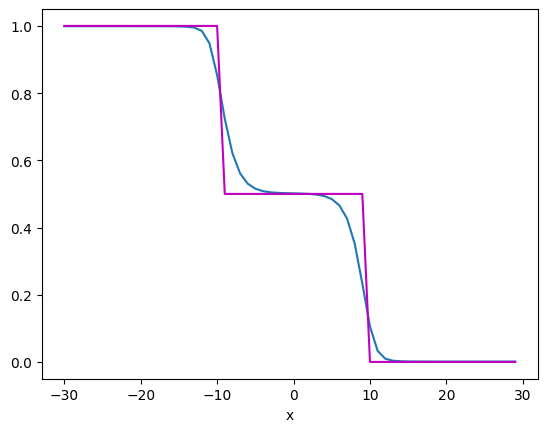

In [ ]:
# Define the training loop
epochs=5000
cost = []
total=0
for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    for x, y in zip(X, Y):
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # get total loss
        total+=loss.item()
    cost.append(total)
    if epoch % 1000 == 0:
        print(str(epoch)+ " " + "epochs done!") # visualze results after every 1000 epochs
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

From which, you can see the approximation in blue is closer to the data in purple. As you can see, the neural network approximates the functions quite nicely. If the function is more complex, you may need more hidden layers or more neurons in the hidden layer, i.e., a more complex model.

Let’s also plot to see how the loss reduced during training.

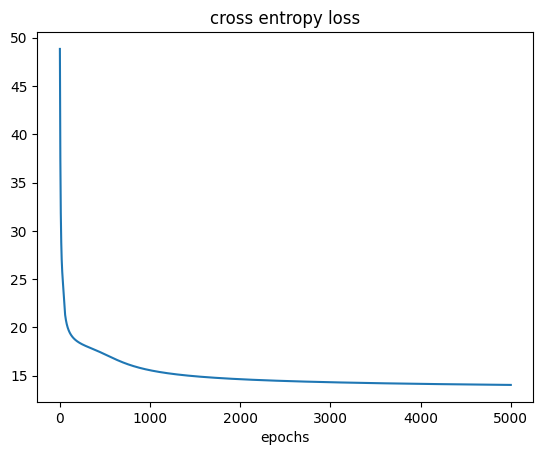

In [ ]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()